# New York Airbnb hosts price analysis by their proximity to Wi-Fi hotspots and Point of Interests

  **Group Members:**

  **Beyza Çavuşoğlu - 23889**

  **Kawtar Lharch - 27095**

#Introduction & Problem Definition :
**The main purpose of the project is to rank the Airbnb hosts in New York City based on their
proximity to touristic points of interest and Wi-Fi Hotspot locations. The goal is trying to answer
several questions by analyzing New York City Airbnb Open Data which can be listed as:**

- If the Airbnb host has more number of Wi-Fi hotspots around it, does that affect the price getting higher?
- If the Airbnb host has more number of points of interests around it, does that affect the price getting higher?
- If the Airbnb host is closer to touristic points of interest, does that affect the price getting higher?
- If the Airbnb host is closer to Wi-Fi hotspots, does that affect the price getting higher?


**Before analyzing the data, the hypothesis was the Airbnb hosts which are closer to touristic points of interest and Wi-Fi Hotspot locations will have a higher price. In this proect, the goal is to show that this hypothesis is accurate. This project aims to help the people who use Airbnb to gain better insight about hosts and make their bookings accordingly.**


# Utilized datasets 
-Dataset of Airbnb hosts (https://www.kaggle.com/dgomonov/new-york-city-airbnb-opendata)

-Dataset of all points of interest in New York City
(https://data.cityofnewyork.us/CityGovernment/Points-Of-Interest/rxuy-2muj )

-Dataset of WIFI Hotspot Locations in NYC
(https://data.cityofnewyork.us/SocialServices/NYC-Wi-Fi-Hotspot-Locations/a9we-mtpn )

**The dataset of Airbnb hosts should be analyzed in detail for observing the correctness of the hypothesis. Before starting to combine several datasets, data preprocessing and feature generation are applied on the Airbnb hosts dataset. Data preprocessing is a crucial technique that transforms raw data into an understandable format and reduces the complexity of data. Aggregation, sampling, dimensionality reduction and data cleaning are few important data pre-processing techniques used in this project. A data frame created from the given dataset. The type of columns and size of data is printed. As an example of data cleaning, irrelevant columns are dropped such as id, minimum_nights, name, host_name, calculated_host_listings_count, last_review, reviews_per_month and number_of_reviews. The column “availability_365” showed the number of days that the host is open, so the rows with zero value in that column is removed.  The columns with NaN values checked, there were not any.**

**After reorganizing the data, the second important step was visualizing it in order to build relevant relationships between the columns. Map, bar chart, pie chart, violin plot, heatmap, strip plot and scatterplot are several used visualization techniques.**

**The code below shows the step told here, required comments added:**


# Data exploration

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Let's start with AirBnB New York data exploration 
df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# get to know the dataset
print('Number of features: %s' %df.shape[1])
print('Number of examples: %s' %df.shape[0])
df.dtypes

Number of features: 16
Number of examples: 48895


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# We should drop the irrelevant columns for our project.
df= df.drop(["id","minimum_nights","name","host_name","calculated_host_listings_count", "last_review", "reviews_per_month", "number_of_reviews" ] , axis=1)
# We should also remove the columns where availability_365 = 0, since if host is 
# never open during whole year, no point of analyzing that.
df = df[~(df == 0).any(axis=1)]

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,194
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,129


In [7]:
df.isnull().sum() / df.shape[0]

# There are no columns with NaN values. Good.

host_id                0.0
neighbourhood_group    0.0
neighbourhood          0.0
latitude               0.0
longitude              0.0
room_type              0.0
price                  0.0
availability_365       0.0
dtype: float64

In [8]:
print('Number of examples: %s' %df.shape[0])
# The example size was 48895, now it is 26147. By data preprocessing, data size is reduced nearly by half.

Number of examples: 31354


##Data Visualization

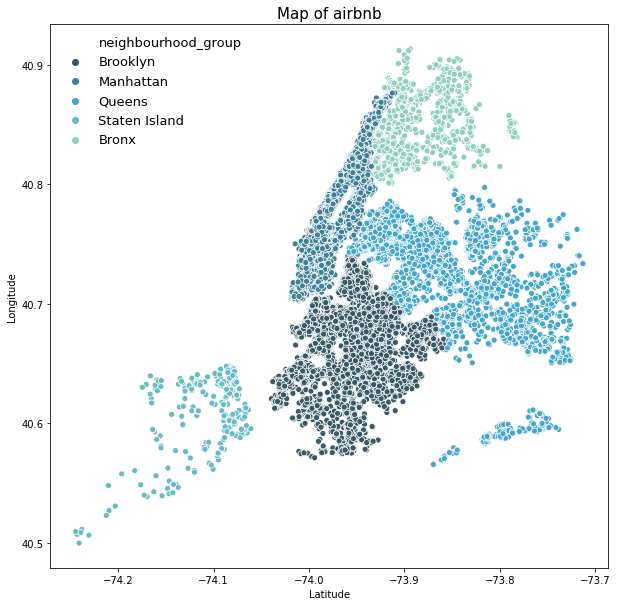

In [9]:
# Visualization - map of hosts

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

Text(0, 0.5, 'Count')

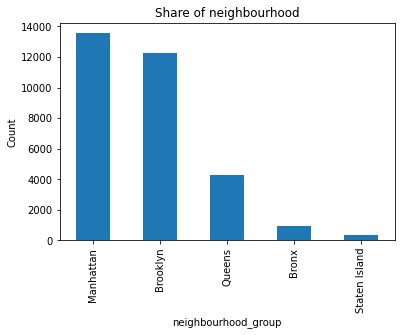

In [10]:
# Distribution of host by neighbourhood in bar chart
df.neighbourhood_group.value_counts().plot(kind="bar")
plt.title("Share of neighbourhood")
plt.xlabel("neighbourhood_group")
plt.ylabel("Count")

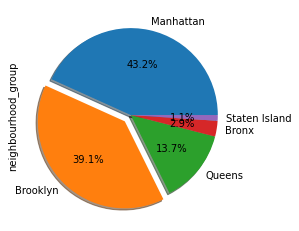

In [11]:
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',shadow=True)

**It has been observed from Figures above that most of the Airbnb hosts are based in Manhattan (41.4%) and Brooklyn (40.8%).**

**The project’s hypothesis was testing if there is a strong correlation between host’s price and their proximity to points of interest & Wi-Fi hotspots. In order to understand that, several plots are done by price based below**

Text(0, 0.5, 'Price')

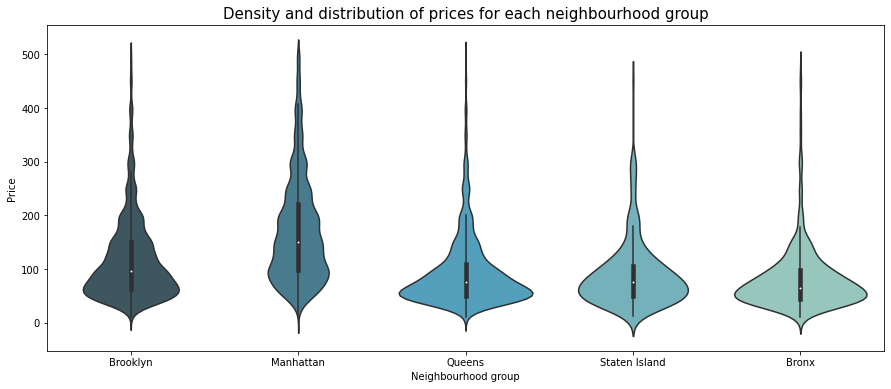

In [12]:
# Visualisation - distribution of prices

plt.figure(figsize=(15,6))
sns.violinplot(data=df[df.price <500], x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

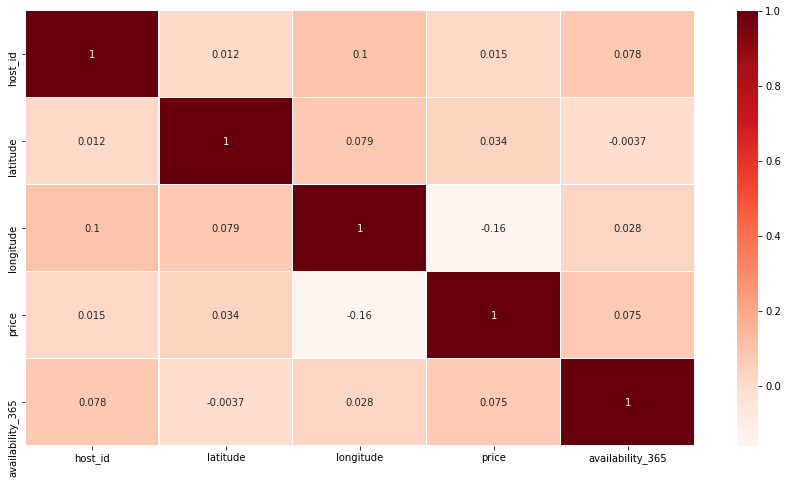

In [13]:
# Visualisation - correlations between values

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, cmap='Reds')

**We can check the heatmap of price column of Airbnb hosts. The number are insignificantly low, so the reason of price distribution can’t be directly understood by using only this dataset.**

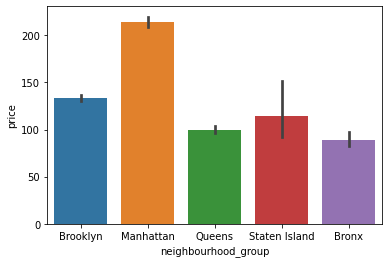

In [14]:
sns.barplot(data=df,x="neighbourhood_group",y="price")
# We can observe that the prices are very high in Manhattan.

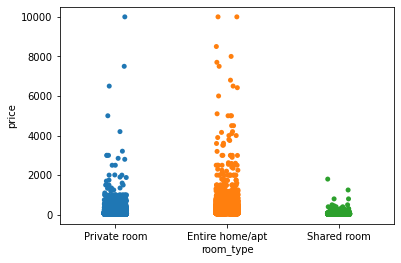

In [15]:
# We can see that different room type has different price range.
sns.stripplot(data=df,x='room_type',y='price',jitter=True)
plt.show()

**Entire home/apartment room types have a higher price, however in general all 3 room types are in the similar range. There is not a high difference between them which means the price is not directly affected from room types of host.**

**Manhattan is the most expensive neighborhood with a notable gap compared to prices of others. Brooklyn is the second most expensive one. It can be concluded that by using other two additional datasets, mainly the focus will be on Manhattan and Brooklyn to check what is causing the high rate of prices.**

##Analysis

**Then 2 datasets are added to the project: New York points of interest locations dataset and Wi-Fi hotspots location datasets. There were some problems with the form of data in relevant columns, they have been reshaped. After, the latitude and longitude values are extracted, they have been paired for these 2 datasets separately. This operation is necessary to compare the host’s and Wi-Fi, point of interest locations.  For the faster processing and more relevant observations, the distance between the most expensive 100 Airbnb listings and the points of interest & public Wi-Fi was used. Then, the range of public Wi-Fi spots that are no further than 200 meters and points of interest that are in the 1500 meters were chosen.**

In [16]:
# First we need to import dataset for Point of Interest
df2 = pd.read_csv(join(path_prefix, "Point_Of_Interest.csv"))
df2.head()

,SAFTYPE,the_geom,SEGMENTID,COMPLEXID,SOS,PLACEID,FACI_DOM,BIN,BOROUGH,CREATED,MODIFIED,FACILITY_T,SOURCE,B7SC,PRI_ADD,NAME
0,N,POINT (-73.93149397004032 40.84419199998088),193927,401,1.0,1031153,8,0,1.0,04/12/2018 12:00:00 AM +0000,03/12/2020 12:00:00 AM +0000,6,DCP,11095502.0,0,HRD RAMP TO GWB OVER HRD SB
1,N,POINT (-74.196729991945 40.63526107028508),321726,0,1.0,19954,8,0,5.0,03/15/2008 12:00:00 AM +0000,03/16/2020 12:00:00 AM +0000,6,DCP,59703501.0,0,GOETHALS
2,N,POINT (-73.9580216105277 40.75848681229432),138896,0,1.0,1026908,8,0,1.0,10/20/2015 12:00:00 AM +0000,03/16/2020 12:00:00 AM +0000,6,DoITT,19792015.0,0,KOCH BR PEDESTRIAN AND BIKE PATH
3,N,POINT (-73.95061614358269 40.755299567687125),139388,0,1.0,1026909,8,0,4.0,10/20/2015 12:00:00 AM +0000,03/16/2020 12:00:00 AM +0000,6,DoITT,49734017.0,0,KOCH BR PEDESTRIAN AND BIKE
4,N,POINT (-73.81678346994171 40.78815244048363),179357,0,2.0,1031297,8,0,4.0,04/13/2018 12:00:00 AM +0000,04/19/2018 12:00:00 AM +0000,6,DCP,40074101.0,0,14 AV OV BELT CROSS ISL PKWY


In [17]:
# We only need the column "the_geom"
# However it should be adjusted, the label "POINT" should be removed, 
# Latitude,Longitude values should be extracted 
df2['latitude'] = df2.the_geom.str.slice(7,-2)


split_data = df2["latitude"].str.split()
data = split_data.to_list()
names = ["Latitude", "Longitude"]
df_interest = pd.DataFrame(data, columns=names)

print(df_interest) 
# df_interest dataframe will be used to compare the locations for correlation 
# between point of interest locations and airbnb hosts.

                 Latitude          Longitude
0      -73.93149397004032   40.8441919999808
1        -74.196729991945   40.6352610702850
2       -73.9580216105277   40.7584868122943
3      -73.95061614358269  40.75529956768712
4      -73.81678346994171   40.7881524404836
...                   ...                ...
20094   -73.9995514952221  40.69932401106119
20095  -74.00936520182077   40.7047467274113
20096  -73.98693051124387   40.7739690039395
20097   -73.9744410207339   40.7234497574176
20098  -73.98489005500024   40.7591587122458

[20099 rows x 2 columns]


In [18]:
#adding the latitude longitude to othe dataframe to have easy access to it later 
df2["LATITUDE"]=df_interest["Latitude"]
df2["LONGITUDE"]=df_interest["Longitude"]
df2.head()

,SAFTYPE,the_geom,SEGMENTID,COMPLEXID,SOS,PLACEID,FACI_DOM,BIN,BOROUGH,CREATED,MODIFIED,FACILITY_T,SOURCE,B7SC,PRI_ADD,NAME,latitude,LATITUDE,LONGITUDE
0,N,POINT (-73.93149397004032 40.84419199998088),193927,401,1.0,1031153,8,0,1.0,04/12/2018 12:00:00 AM +0000,03/12/2020 12:00:00 AM +0000,6,DCP,11095502.0,0,HRD RAMP TO GWB OVER HRD SB,-73.93149397004032 40.8441919999808,-73.93149397004032,40.8441919999808
1,N,POINT (-74.196729991945 40.63526107028508),321726,0,1.0,19954,8,0,5.0,03/15/2008 12:00:00 AM +0000,03/16/2020 12:00:00 AM +0000,6,DCP,59703501.0,0,GOETHALS,-74.196729991945 40.6352610702850,-74.196729991945,40.6352610702850
2,N,POINT (-73.9580216105277 40.75848681229432),138896,0,1.0,1026908,8,0,1.0,10/20/2015 12:00:00 AM +0000,03/16/2020 12:00:00 AM +0000,6,DoITT,19792015.0,0,KOCH BR PEDESTRIAN AND BIKE PATH,-73.9580216105277 40.7584868122943,-73.9580216105277,40.7584868122943
3,N,POINT (-73.95061614358269 40.755299567687125),139388,0,1.0,1026909,8,0,4.0,10/20/2015 12:00:00 AM +0000,03/16/2020 12:00:00 AM +0000,6,DoITT,49734017.0,0,KOCH BR PEDESTRIAN AND BIKE,-73.95061614358269 40.75529956768712,-73.95061614358269,40.75529956768712
4,N,POINT (-73.81678346994171 40.78815244048363),179357,0,2.0,1031297,8,0,4.0,04/13/2018 12:00:00 AM +0000,04/19/2018 12:00:00 AM +0000,6,DCP,40074101.0,0,14 AV OV BELT CROSS ISL PKWY,-73.81678346994171 40.7881524404836,-73.81678346994171,40.7881524404836


In [19]:
# WIFI dataset 
df3 = pd.read_csv(join(path_prefix, "NYC_Free_Public_WiFi_03292017.csv"))
df3.head()

,BORO,the_geom,OBJECTID,TYPE,PROVIDER,NAME,LOCATION,LAT,LON,X,Y,LOCATION_T,REMARKS,CITY,SSID,SOURCEID,ACTIVATED,BOROCODE,BORONAME,NTACODE,NTANAME,COUNDIST,POSTCODE,BOROCD,CT2010,BOROCT2010,BIN,BBL,DOITT_ID
0,BK,POINT (-73.87053740957452 40.68406083967918),10321,Free,LinkNYC - Citybridge,bk-05-145941,3386 FULTON STREET,40.684061,-73.870537,1.020156e+06,188524.768013,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021921,11/21/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3327234,3041480040,4726
1,BK,POINT (-73.86897452703059 40.68462509021575),10322,Free,LinkNYC - Citybridge,bk-05-145940,3435 FULTON STREET,40.684625,-73.868975,1.020589e+06,188730.985121,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021922,11/21/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3092471,3041340160,4727
2,BK,POINT (-73.86830878947508 40.68470155389536),10323,Free,LinkNYC - Citybridge,bk-05-145939,3450 FULTON STREET,40.684702,-73.868309,1.020774e+06,188759.119907,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021923,11/21/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093023,3041510030,4728
3,BK,POINT (-73.86677732990765 40.68513094043811),10324,Free,LinkNYC - Citybridge,bk-05-145938,3480 FULTON STREET,40.685131,-73.866777,1.021198e+06,188916.199973,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021925,12/20/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093078,3041520030,4729
4,BK,POINT (-73.89716745051707 40.67647466963193),10325,Free,LinkNYC - Citybridge,bk-05-145932,62 PENNSYLVANIA AVENUE,40.676475,-73.897167,1.012774e+06,185751.116409,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021926,02/06/2018 12:00:00 AM +0000,3,Brooklyn,BK82,East New York,37,11207,305,198,3119800,3083275,3036690030,4730


In [20]:
# We only need the column "the_geom"
# However it should be adjusted, the label "POINT" should be removed, 
# Latitude,Longitude values should be extracted 
df3['latitude'] = df3.the_geom.str.slice(7,-2)


split_data = df3["latitude"].str.split()
data2 = split_data.to_list()
names = ["Latitude", "Longitude"]
df_wifi = pd.DataFrame(data2, columns=names)

print(df_wifi) 
# df_interest dataframe will be used to compare the locations for correlation 
# between point of interest locations and airbnb hosts.

                Latitude          Longitude
0     -73.87053740957452   40.6840608396791
1     -73.86897452703059   40.6846250902157
2     -73.86830878947508   40.6847015538953
3     -73.86677732990765   40.6851309404381
4     -73.89716745051707   40.6764746696319
...                  ...                ...
3314  -73.98061299986409  40.68885099970276
3315  -73.98086658959652   40.6852183298327
3316  -73.98496961348239   40.6868115694076
3317  -73.99314691026974    40.687900800340
3318   -73.9945262011057   40.6853897560042

[3319 rows x 2 columns]


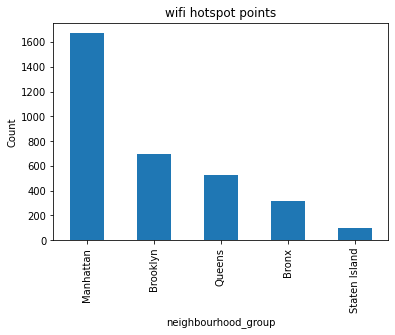

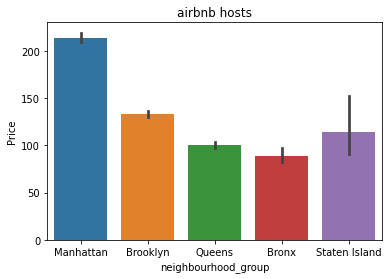

In [21]:
# TO SHOW WIFI SPOTS AND PRICE OF AIRBNB CORRELATION

plot1 = plt.figure(1)        
df3.BORONAME.value_counts().plot(kind="bar")
plt.title("wifi hotspot points")
plt.xlabel("neighbourhood_group")
plt.ylabel("Count")

plot2 = plt.figure(2)

sns.barplot(data=df,  x="neighbourhood_group", y="price",  order = ["Manhattan", "Brooklyn", "Queens" , "Bronx", "Staten Island"])
plt.title("airbnb hosts")
plt.xlabel("neighbourhood_group")
plt.ylabel("Price")

plt.show()

**Before analyzing the data, the hypothesis was the Airbnb hosts which are closer to the Wi-Fi Hotspot locations will have a higher price. As it can be seen from plot above, for Manhattan, Brooklyn and Queens (which has the top 3 of number of hosts in New York), there is a strong correlation between price and number of Wi-Fi hotspot. This would point the correctness of the hypothesis like a proof.**

In [22]:
# showing the new data frame of points pf interest with longitude and latitude
df3["LATITUDE"]=df_wifi["Latitude"]
df3["LONGITUDE"]=df_wifi["Longitude"]
df3.head()

,BORO,the_geom,OBJECTID,TYPE,PROVIDER,NAME,LOCATION,LAT,LON,X,Y,LOCATION_T,REMARKS,CITY,SSID,SOURCEID,ACTIVATED,BOROCODE,BORONAME,NTACODE,NTANAME,COUNDIST,POSTCODE,BOROCD,CT2010,BOROCT2010,BIN,BBL,DOITT_ID,latitude,LATITUDE,LONGITUDE
0,BK,POINT (-73.87053740957452 40.68406083967918),10321,Free,LinkNYC - Citybridge,bk-05-145941,3386 FULTON STREET,40.684061,-73.870537,1.020156e+06,188524.768013,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021921,11/21/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3327234,3041480040,4726,-73.87053740957452 40.6840608396791,-73.87053740957452,40.6840608396791
1,BK,POINT (-73.86897452703059 40.68462509021575),10322,Free,LinkNYC - Citybridge,bk-05-145940,3435 FULTON STREET,40.684625,-73.868975,1.020589e+06,188730.985121,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021922,11/21/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3092471,3041340160,4727,-73.86897452703059 40.6846250902157,-73.86897452703059,40.6846250902157
2,BK,POINT (-73.86830878947508 40.68470155389536),10323,Free,LinkNYC - Citybridge,bk-05-145939,3450 FULTON STREET,40.684702,-73.868309,1.020774e+06,188759.119907,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021923,11/21/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093023,3041510030,4728,-73.86830878947508 40.6847015538953,-73.86830878947508,40.6847015538953
3,BK,POINT (-73.86677732990765 40.68513094043811),10324,Free,LinkNYC - Citybridge,bk-05-145938,3480 FULTON STREET,40.685131,-73.866777,1.021198e+06,188916.199973,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021925,12/20/2017 12:00:00 AM +0000,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093078,3041520030,4729,-73.86677732990765 40.6851309404381,-73.86677732990765,40.6851309404381
4,BK,POINT (-73.89716745051707 40.67647466963193),10325,Free,LinkNYC - Citybridge,bk-05-145932,62 PENNSYLVANIA AVENUE,40.676475,-73.897167,1.012774e+06,185751.116409,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021926,02/06/2018 12:00:00 AM +0000,3,Brooklyn,BK82,East New York,37,11207,305,198,3119800,3083275,3036690030,4730,-73.89716745051707 40.6764746696319,-73.89716745051707,40.6764746696319


In [23]:
#choosing the first 100 most expensive airbnb 
df_c = df.copy()
df_c = df_c.sort_values(by="price", ascending=False)
df_c = df_c[0:100]
df_c.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,availability_365
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,83
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,83
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,365
30268,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,251
4377,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,365


In [24]:
# we want to find the number of wifi spots are around the airbnb listings
from geopy.distance import geodesic

def numberofwifi(DATA) :
  count = 0
  origin = (DATA["latitude"],DATA["longitude"])
  for i in df3[["LATITUDE" ,"LONGITUDE"]].values:
    end_pt = (i[1] ,i[0])
    distance = geodesic(origin , end_pt).meters 
    if (distance< 1000):
      count += 1
  return count 

df_c["WIFI COUNT"] = df_c.apply(numberofwifi , axis = 1)
df_c.sort_values(by="WIFI COUNT" , ascending=False)
df_c.head()


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,availability_365,WIFI COUNT
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,83,101
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,83,19
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,365,48
30268,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,251,62
4377,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,365,29


In [25]:
#Doing the same agian for the wifi 
df_c[["WIFI COUNT","price"]].sort_values(by="WIFI COUNT" ,ascending=False )

,WIFI COUNT,price
46895,227,1750
43009,223,5100
38223,200,3000
39912,187,1999
45414,186,1900
...,...,...
24477,2,2500
45666,2,7500
11264,1,2000
42680,1,2600


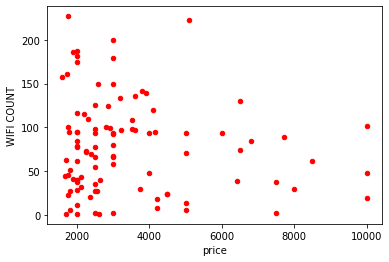

In [26]:
# to better understand the data related to wifi , lets visualize 

df_c.plot(kind = "scatter",x= "price", y= "WIFI COUNT" , color= "red")

In [0]:
df_c2 = df_c.copy()

In [28]:
#WE WILL ALSO BE DOING THAT TO THE POINTS OF INTEREST 
from geopy.distance import geodesic

def numberofinterest(DATA) :
  count = 0
  origin = (DATA["latitude"],DATA["longitude"])
  for i in df2[["LATITUDE" ,"LONGITUDE"]].values:
    endpoint = (i[1] ,i[0])
    distance = geodesic(origin , endpoint).meters 
    # choosing 1000 metres as the distance one would walk to 
    if (distance< 1000):
      count += 1
  return count 

df_c2["pts_interest"] = df_c2.apply(numberofinterest , axis = 1)
df_c2.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,availability_365,WIFI COUNT,pts_interest
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,83,101,278
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,83,19,286
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,365,48,425
30268,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,251,62,197
4377,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,365,29,178


In [29]:
#and for our specific project we would like to find a correlation between these 2 variables
df_c2[["pts_interest","price"]].sort_values(by="pts_interest" ,ascending=False )

,pts_interest,price
39912,471,1999
19270,467,2000
19802,436,2000
40433,425,9999
18356,416,2500
...,...,...
24477,52,2500
17811,51,2350
11264,48,2000
25947,38,1700


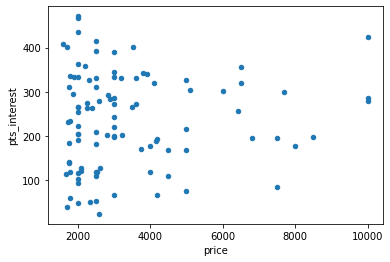

In [30]:
#to better understand the dat arelated to points of interest , lets visualize
df_c2.plot(kind ="scatter",x="price", y="pts_interest")

**It can be observed from the plot above that there is not a direct relation between locations of
points of interest and Airbnb prices. This part of hypothesis could not be proved with the data we have so far.**


# Machine Learning Models

**For Machine Learning, we will train 3 supervised machine learning models in order to be able to compare these models by their accuracies. 
The 3 modeles are :**



**1.   k-Nearest Neighbour Classifier Model**

**2.   Decision Tree Classifier Model**

**3.   Random Forest Classifier Model**






##Implementation of Knn model 

In [0]:
#we would like to predict price based on wifi count and pts of interest 
#our label is then price and features are wifi count and pts of interest 
# separate features and the price column
X = df_c2[["WIFI COUNT","pts_interest"]]
y = df_c2["price"]

from sklearn.model_selection import train_test_split

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=1)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=1)

#We will create a list to collect all 3 different ML models' accuracies we used and plot them later to decide which one is better
models_acc=[]

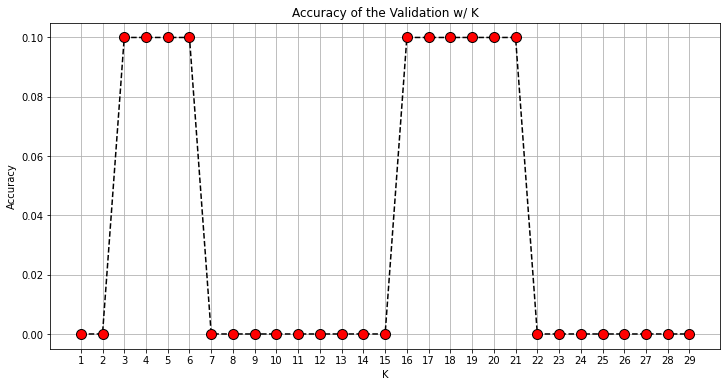

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#we have to determine the value of the hyperparameter 
K_range = np.arange(1, 30)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  model = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  model.fit(X_train, y_train)
  # predict the validation data
  y_pred = model.predict(X_val)
  # obtain the accuracy value
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [77]:
#as can be deduced from the above graph the most accuracy is gotten when the value of k is between 3-7 and 16-22
#so we will take it as 5
# create a new model with current K and euclidean distance
knn = KNeighborsClassifier(5, metric="euclidean")
# fit training data
knn.fit(X_train, y_train)
# predict the validation data
y_pred = knn.predict(X_test)
# obtain the accuracy value
knn_acc = accuracy_score(y_test, y_pred)

models_acc.append(knn_acc)
print("k-NN model accuracy : " + str(knn_acc))

k-NN model accuracy : 0.1


##Implementation of Decision tree Model


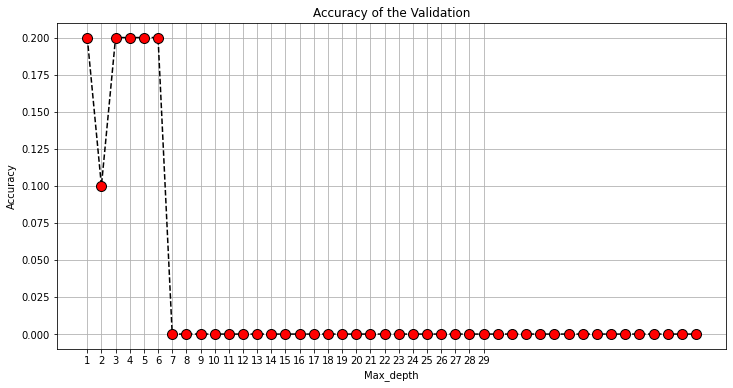

In [78]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#Decision Tree Training

#we have to determine the value of the hyperparameter of max_depth
my_range = np.arange(1, 45)
accuracy_list_2 = []

for k in my_range:
  # create a new model with current K
  model_dt = tree.DecisionTreeClassifier(random_state=1, max_depth=k) #Create decision tree classifier object
  # fit training data
  model_dt.fit(X_train, y_train) #train the classifier using the training data
  # predict the validation data
  dt_predictions = model_dt.predict(X_test)
  # obtain the accuracy value
  dt_acc = accuracy_score(y_test, dt_predictions)
  accuracy_list_2.append(dt_acc)


plt.figure(figsize=(12, 6))  
plt.plot(my_range, accuracy_list_2, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation')  
plt.xlabel('Max_depth')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()



**As we have seen, the best accuracy score is with max_depth = 1,3,4,5,6. We can choose max_depth=3 to train our model with decision tree classifier**


In [79]:
dt_model = tree.DecisionTreeClassifier(random_state=1, max_depth=3) #Create decision tree classifier object
# fit training data
dt_model.fit(X_train, y_train) #train the classifier using the training data
# predict the validation data
dt_prediction = dt_model.predict(X_test)
# obtain the accuracy value
dt_accuracy = accuracy_score(y_test, dt_prediction)
models_acc.append(dt_accuracy)
print("Decision tree model with max_depth=3 accuracy : " + str(dt_accuracy))

Decision tree model with max_depth=3 accuracy : 0.2


# Implementation of Random Forest Classifier Model

In [80]:
#Random Forest Training(In new version default of estimators will be 100)
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
model_rf.fit(X_train, y_train)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)
models_acc.append(rf_acc)
print("Random Forest Accuracy:"+str(rf_acc))

Random Forest Accuracy:0.1


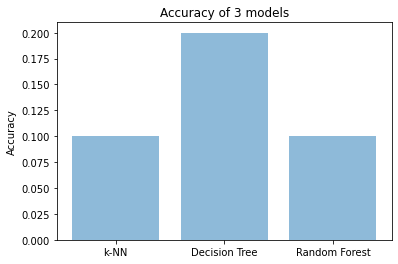

In [85]:
objects = ('k-NN', 'Decision Tree', 'Random Forest')
y_pos = np.arange(len(objects))

plt.bar(y_pos, models_acc, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy of 3 models')

plt.show()

#Results & Discussion

**As the observations, 3 different machine learning models were trained on the data and their accuracies have been obtained. 
According to bar chart, it can be seen that using a decision tree with max_depth=3 will give a better accuracy, so we would choose to use a decision tree classifier model.**

**As a general result of this project, the hypothesis at the beginning is partially proved to be correct. It has been observed that if the Airbnb host has more number of Wi-Fi hotspots around it, this will affect the price getting higher. However, the proximity of Airbnb hosts to the points of interests could not been strongly correlated to the increase in price.**